In [17]:
## Libraries and Modules used 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os


In [5]:
## Import data set to notebook 
loan_data = pd.read_csv('/Users/noahanderson/Documents/GitHub/credit-lending-analysis/Data/Raw_Data/loan.csv', low_memory=False)

In [6]:
## Checking for basic features 
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
## Removing Unwanted Columns 
loan_data.drop(columns=['emp_title', 'verification_status', 'url', 'desc','title','zip_code','addr_state'], inplace=True)

In [13]:
## Exporting modified Data back to CSV 
output_path = "/Users/noahanderson/Documents/GitHub/credit-lending-analysis/Data/Processed_Data/column_modified_loan.csv"
loan_data.to_csv(output_path, index=False)

(887379, 74)


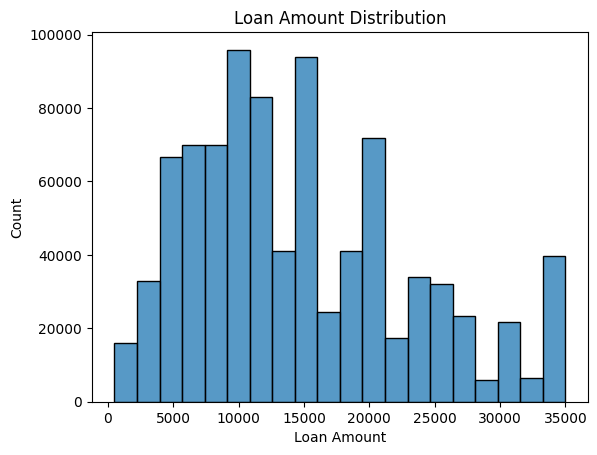

In [27]:
## Observing Raw Data 
print(loan_data.shape)
## Histogram 

loan_amounts = loan_data['loan_amnt']
sns.histplot(loan_amounts, bins=20, label='Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Count')
plt.title('Loan Amount Distribution')

## Exporting 
output_folder = '/Users/noahanderson/Documents/GitHub/credit-lending-analysis/Data/Processed_Data/graphs_and_plots'
os.makedirs(output_folder, exist_ok=True)

output_path = os.path.join(output_folder, 'hist_of_loan_amount.png')

plt.savefig(output_path, dpi=300, bbox_inches='tight')
plt.show()

In [30]:
## Looking at variable information
loan_data.info
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [33]:
## Looking at delinquent data
delinquency_nums = loan_data['acc_now_delinq']
delinquency_nums.value_counts()

## Looking at Loan Status

loan_status_nums = loan_data['loan_status']
loan_status_nums.value_counts()

loan_status
Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: count, dtype: int64

In [40]:
## Created a data set with only delinquent values

delinquent_loan_status_data = loan_data[
        loan_data['loan_status'].isin(['Charged Off', 'Late (16-30 days)', 'Late (31-120 days)'])
]
delinquent_loan_status_data.shape
## Exporting Modified Loan Data set 
new_path = "/Users/noahanderson/Documents/GitHub/credit-lending-analysis/Data/Processed_Data/delinquent_data_set.csv"
delinquent_loan_status_data.to_csv(new_path, index=False)